In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
data_path = '/Users/ashisdas/Downloads/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv'
df = pd.read_csv(data_path)

In [5]:
# Quick check
print(df.head())
print(df.describe())

   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
            emotion
count  28709.000000
mean       3.317427
std        1.876632
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000


In [6]:

# FER-2013 emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Add text labels to the DataFrame
df['emotion_label'] = df['emotion'].map(emotion_labels)

# Frequency table
emotion_counts = df['emotion_label'].value_counts()
print(emotion_counts)

# Optional: show percentages too
print("\nPercentages:\n")
print(round(df['emotion_label'].value_counts(normalize=True) * 100, 2))


emotion_label
Happy       7215
Neutral     4965
Sad         4830
Fear        4097
Angry       3995
Surprise    3171
Disgust      436
Name: count, dtype: int64

Percentages:

emotion_label
Happy       25.13
Neutral     17.29
Sad         16.82
Fear        14.27
Angry       13.92
Surprise    11.05
Disgust      1.52
Name: proportion, dtype: float64


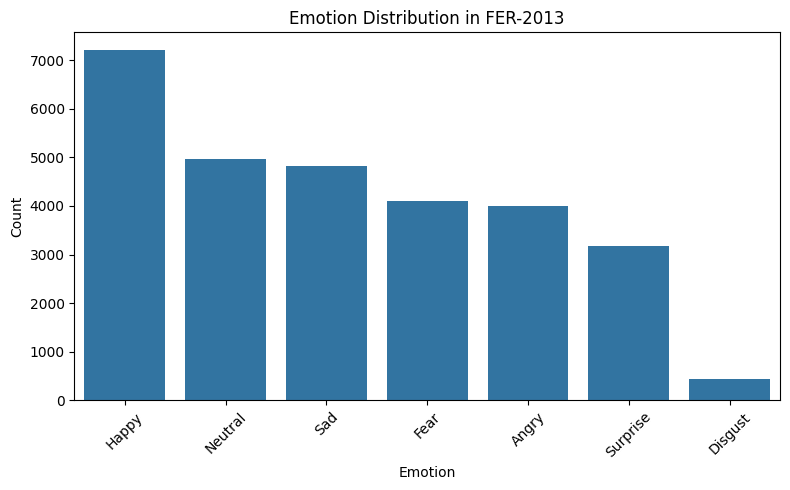

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='emotion_label', data=df, order=emotion_counts.index)
plt.title("Emotion Distribution in FER-2013")
plt.ylabel("Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


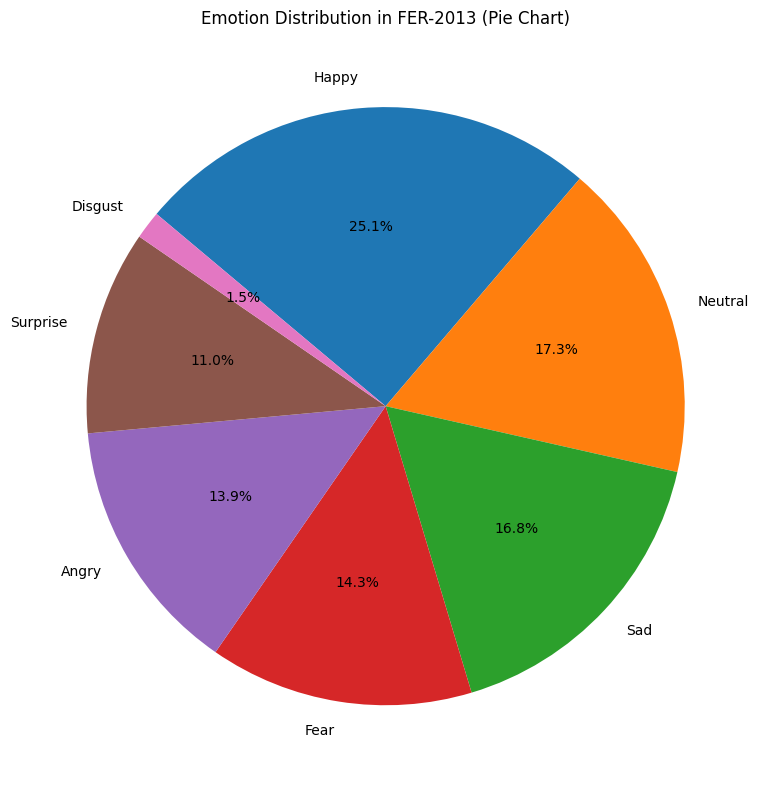

In [8]:

# Calculate emotion counts if not already
emotion_counts = df['emotion_label'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_counts,
    labels=emotion_counts.index,
    autopct='%1.1f%%',        # Show percentages
    startangle=140,           # Rotate start angle
    counterclock=False        # Plot clockwise
)
plt.title("Emotion Distribution in FER-2013 (Pie Chart)")
plt.tight_layout()
plt.show()


In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def process_pixels(pixels):
    return np.array(pixels.split(), dtype='float32').reshape(48, 48, 1)

# Convert pixel string to 48x48 images
X = np.array([process_pixels(pix) for pix in df['pixels']])
X = X / 255.0  # normalize
y = to_categorical(df['emotion'])  # one-hot encode labels

# Train-val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y.argmax(1), random_state=42)

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)


Train shape: (22967, 48, 48, 1)
Val shape: (5742, 48, 48, 1)


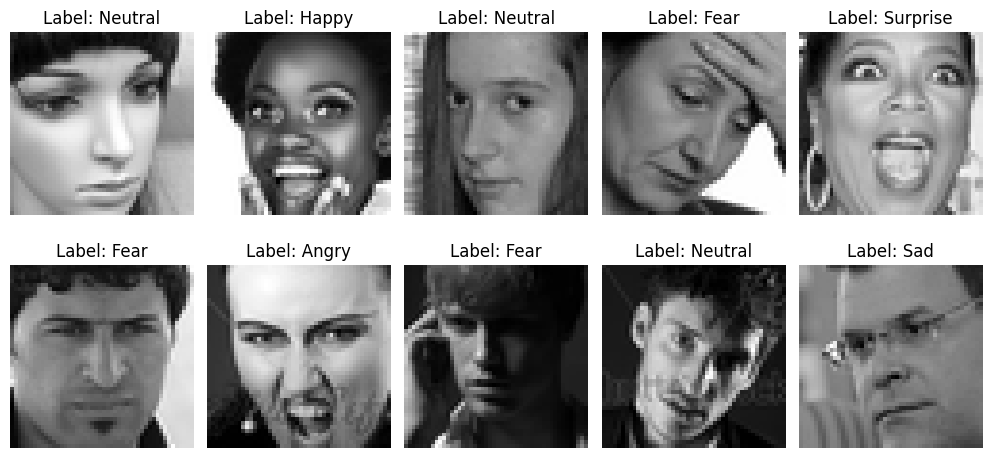

In [11]:
import matplotlib.pyplot as plt

# Display first 50 images from the training set
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)  # Create a grid of 10x5
    plt.imshow(X_train[i].reshape(48, 48), cmap='gray')
    plt.title(f"Label: {emotion_labels[np.argmax(y_train[i])]}")  # Display emotion label
    plt.axis('off')  # Turn off axis

plt.tight_layout(pad=1.0)  # Adjust padding between subplots for better spacing
plt.show()


In [13]:


model_small = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model_small.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_small.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2335 - loss: 1.8607 - val_accuracy: 0.3184 - val_loss: 1.7067
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2883 - loss: 1.7257 - val_accuracy: 0.3565 - val_loss: 1.6260
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3070 - loss: 1.6783 - val_accuracy: 0.3952 - val_loss: 1.6137
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3304 - loss: 1.6441 - val_accuracy: 0.3918 - val_loss: 1.5686
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3389 - loss: 1.6162 - val_accuracy: 0.4162 - val_loss: 1.5428
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3490 - loss: 1.5968 - val_accuracy: 0.4183 - val_loss: 1.5260
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3534 - loss: 1.5788 - val_accuracy: 0.4053 - val_loss: 1.5359
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3691 - loss: 1.5459 - val_accu